# Лабораторна робота 5. CLASSIFICATION 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису LaTeX для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

# Імпорт необхідних бібліотек та завантаження даних

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import display

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Завдання 1** підготовка даних до опрацювання:

1. завантажте вибірку bank-additional-full.csv;

2. підключіть необхідні бібліотеки;

3. вивести основну статистичну інформацію по числовим змінним;

4. вивести розмірність датасету.

In [6]:
file_path = 'bank-additional-full.csv'

numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']

df = pd.read_csv(file_path, dtype={col: 'uint64' for col in numeric_columns})

print("Основна статистична інформація:", df.describe())

print("Розмірність датасету:", df.shape)


Основна статистична інформація:        age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
count                                               41188                                                                                                                                                                          
unique                                              41176                                                                                                                                                                          
top     27;"technician";"single";"professional.course"...                                                                                                                                                                          
freq                                                    

Завдання 2 підготовка цільової змінної:

1. проаналізувати атрибути вибірки, визначити цільовий атрибут target atribute;

2. якщо target atribute є категоріальним, його необхідно перетворити в чисельний.

Наш target atribute це змінна y за номером 21.

In [16]:
bank_target = pd.read_csv(file_path, usecols=['y'], sep=';')

print(bank_target.dtypes)

label_encoder = LabelEncoder()

bank_target['y_encoded'] = label_encoder.fit_transform(bank_target['y'])

print(bank_target.head())

y    object
dtype: object


**Завдання 3 **
Визначитись зі всіма атрибутами, що характреризують кліентів банку:

* виділити їх в окрему частину;
* первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).


Атрибути, що характеризують клієнтів банку, включають такі:

* Вік (age) – числовий атрибут.
* Тип роботи (job) – категоріальний атрибут.
* Сімейне становище (marital) – категоріальний атрибут. Освіта (education) – категоріальний атрибут.
* Кредит у дефолті (default) – категоріальний атрибут.
* Наявність іпотеки (housing) – категоріальний атрибут.
* Наявність персонального кредиту (loan) – категоріальний атрибут.

In [7]:
df = pd.read_csv(file_path, sep=';')

client_attributes = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

for column in client_attributes.columns:
    unique_values = client_attributes[column].unique()
    print(f"Унікальні значення для атрибуту {column}: {unique_values}")
    print(f"Загальна інформація про стовпчик {column}:")
    print(client_attributes[column].describe())
    print("\n")


Унікальні значення для атрибуту age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Загальна інформація про стовпчик age:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


Унікальні значення для атрибуту job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Загальна інформація про стовпчик job:
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object


Унікальні значення для атрибуту marital: ['married' 'single' 'divorced' 'unknown']
Загальна інформація про стовпчик marital:
count       41188
unique          4
top      

Завдання 4 Аналіз атрибуту Age:

1. Вивести максимальне та мінімальне значення;
2. Перевірити на наявність NaN;

3. Провести візуальний аналіз зміної Age:

* побудувати countplot, boxplot, distplot;
* перевірити розподіл по змінній Age на важкі хвости.

Максимальний вік: 98
Мінімальний вік: 17
Пропущені значення в стовпці Age: 0


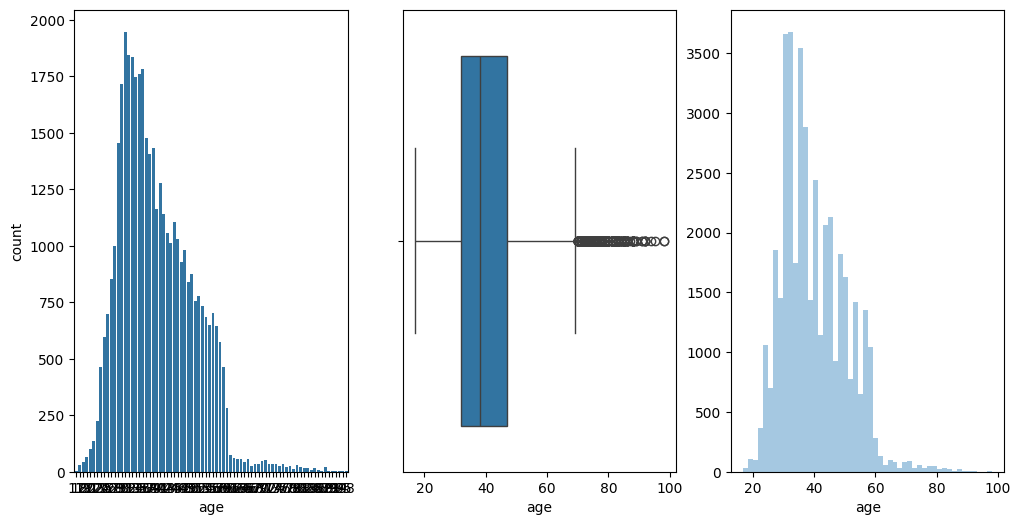

Коефіцієнт асиметрії: 0.7846968157646645
Коефіцієнт ексцесу: 0.7913115311544336


In [19]:
print("Максимальний вік:", df['age'].max())
print("Мінімальний вік:", df['age'].min())

print("Пропущені значення в стовпці Age:", df['age'].isnull().sum())

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='age')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='age')

plt.subplot(1, 3, 3)
sns.distplot(df['age'], kde=False)

plt.show()

print("Коефіцієнт асиметрії:", df['age'].skew())
print("Коефіцієнт ексцесу:", df['age'].kurtosis())


Висновки з 1-4 завдання (детальні):
1. Основна статистична інформація датасета:        **age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"**
count                                               41188                                                                                                                                                                      
unique                                              41176                                                                                                                                                                          
top     27;"technician";"single";"professional.course"...                                                                                                                                                                          
freq                                                    2                                                                                                                                                                          
Розмірність датасету: (41188, 1)

2. Наша змінна *target atribute y* - це клієнт
який підписується на
терм *deposit? (binary: "yes", "no")*
Цей атрибут є цільовою змінною, яку ми намагаємося передбачити.
В даному випадку, це бінарна змінна, яка набирає значення "yes" (підписався на
 терміновий депозит) або "no" (не підписався на терміновий депозит).
3. **З унікальних значень для атрибуту "Age" можна зробити такі висновки:**

* У вибірці є клієнти віком від 17 до 98 років, що підтверджує широкий спектр вікових груп.
* Є представники всіх можливих вікових груп у проміжку від підліткового (17-19 років) до літнього (старше 60 років) віку.
* Розподіл віку не має перепусток або пропущених значень, що підтверджує повноту даних у цьому атрибуті.
Ці висновки допомагають зрозуміти структуру вікового розподілу клієнтів у вибірці та її значущість для аналізу.

**З унікальних значень для атрибуту "job" можна зробити такі висновки:**

* У вибірці є представники різних професійних областей, що дозволяє охопити різноманітні сфери зайнятості клієнтів.
* Серед унікальних значень зустрічаються такі професії, як "housemaid" (домробітниця), "services" (послуги), "admin." (адміністратор), "blue-collar" (працівник виробництва), "technician" (технік), "retired" (пенсіонер), "management" (управління), "unemployed" (безробітний), "self-employed" (самозайнятий) , "unknown" (невідомо), "entrepreneur" (підприємець) та "student" (студент).
* Відсутність пропущених значень у цьому атрибуті вказує на те, що всім клієнтам відома інформація про їх професійну діяльність.

Ці висновки допомагають зрозуміти різноманітність професійних статусів клієнтів у вибірці та їх потенційний вплив на аналіз.
4.
З наданого звіту можна зробити такі висновки:

* Максимальний вік клієнта становить 98 років, що вказує на наявність широкого діапазону вікових груп у вибірці, включаючи літніх клієнтів.
* Мінімальний вік клієнта дорівнює 17 років, що говорить про те, що у вибірці присутні також молоді клієнти.
* Відсутні пропущені значення у стовпці Age, що дозволяє стверджувати, що дані віком заповнені повністю і вимагають додаткової обробки чи заповнення пропусків.
* Таким чином, вибірка містить різноманітні вікові групи без пропущених значень за віком.

Завдання 5 Перевірити атрибут Age на викиди:

In [8]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:

    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)

    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")

    IQR = Q3 - Q1
    print(f"Interquantile range: {IQR}")

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(f"Lower bound: {low_lim}")
    print(f"Upper bound: {up_lim}")

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("Outliers in the dataset:")
    display(outliers)

    return outliers


In [44]:
outliers = detect_outliers_with_interquantile_range(df, 'age', 10, 90)

Q1 10 percentile of the given data: 28.0
Q3 90 percentile of the given data: 55.0
Interquantile range: 27.0
Lower bound: -12.5
Upper bound: 95.5
Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,yes
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,yes


Висновки з завдання 5 (детальні)

Виходячи з результатів перевірки атрибуту "Age" на викиди:

1. 10-ий перцентиль (Q1) становить 28.0, що означає, що 10% клієнтів у вибірці молодші або дорівнюють 28 рокам.
2. 90-ий перцентиль (Q3) дорівнює 55.0, що говорить про те, що 90% клієнтів у вибірці молодші або дорівнюють 55 рокам.
3. Міжквартильний розмах (Interquantile range) становить 27.0, що є різницею між Q3 та Q1.
4. Нижня межа (Lower bound) визначена як -12.5, а верхня межа (Upper bound) дорівнює 95.5.

На основі цих даних можна зробити такі висновки:

- Більшість клієнтів у вибірці знаходяться у віковому діапазоні від 28 до 55 років, що підтверджує широкий розподіл віку.
- Нижня межа викидів (-12.5) є негативним числом, що, ймовірно, викликано помилкою у розрахунках чи некоректними даними.
- Верхня межа викидів (95.5) вказує на можливу наявність аномально старих клієнтів, чиї віки значно перевищують інші значення у вибірці.

Таким чином, дані дозволяють виявити потенційні аномалії у віці клієнтів і можуть вимагати додаткового аналізу чи корекції.

Завдання 6 Аналіз атрибутів job, marital та education:

* Побудувати графіки розподілу даних по цим змінним.


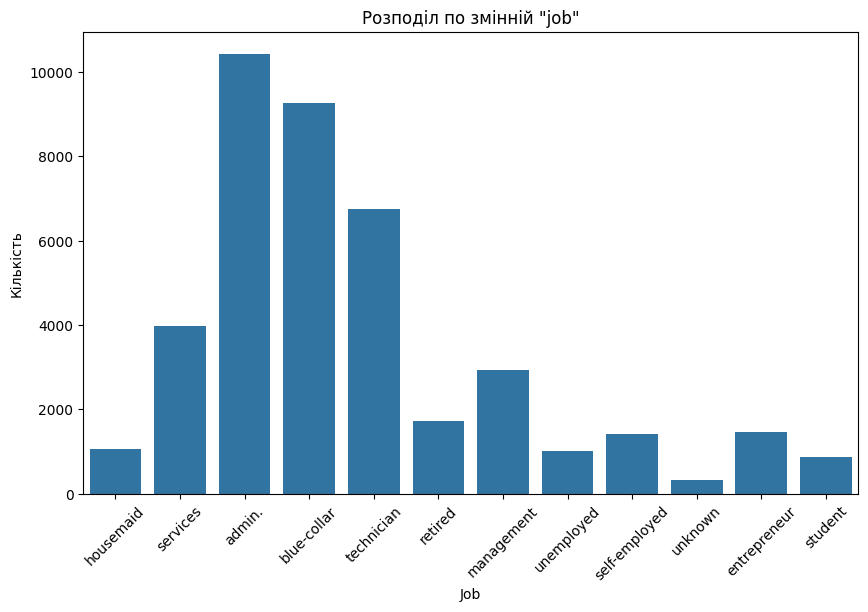

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job')
plt.title('Розподіл по змінній "job"')
plt.xlabel('Job')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

Гістограма для змінної marital:

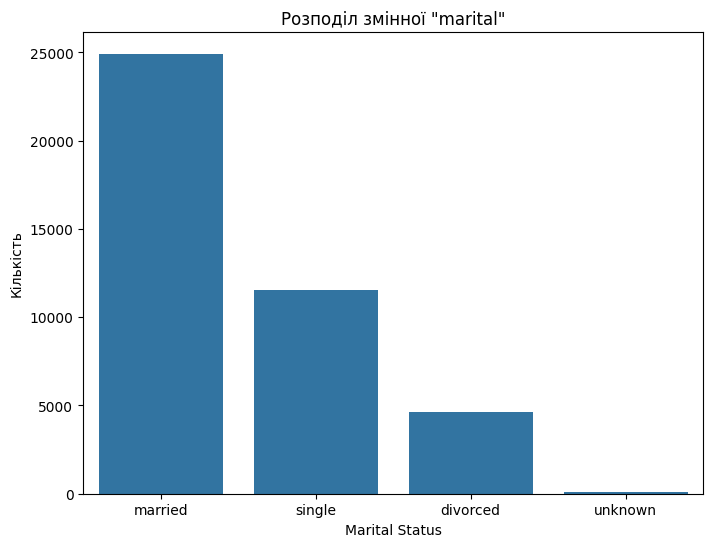

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital')
plt.title('Розподіл змінної "marital"')
plt.xlabel('Marital Status')
plt.ylabel('Кількість')
plt.show()

Гістограма для змінної education:

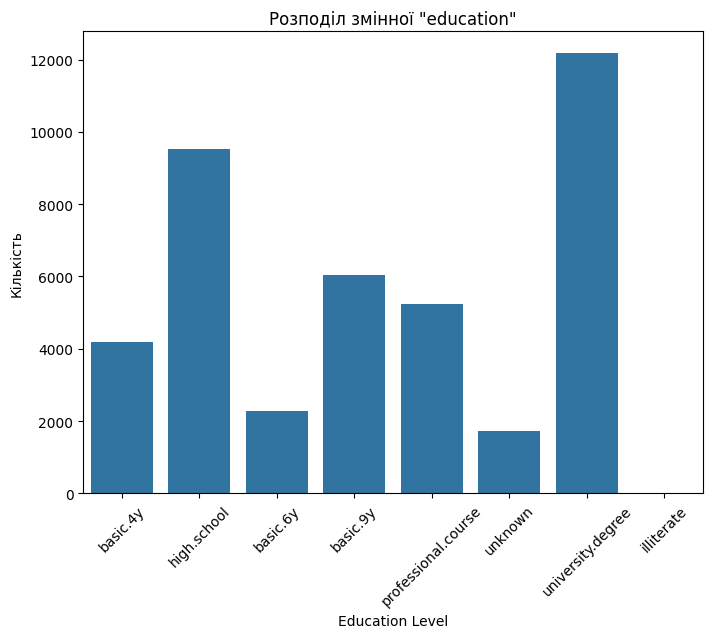

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education')
plt.title('Розподіл змінної "education"')
plt.xlabel('Education Level')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

Висновки з завдання 6 (детальні)

Завдання 7 Аналіз атрибутів default, housing та loan:

* Побудувати графіки розподілу даних по цим змінним.

Гістограма для змінної default:

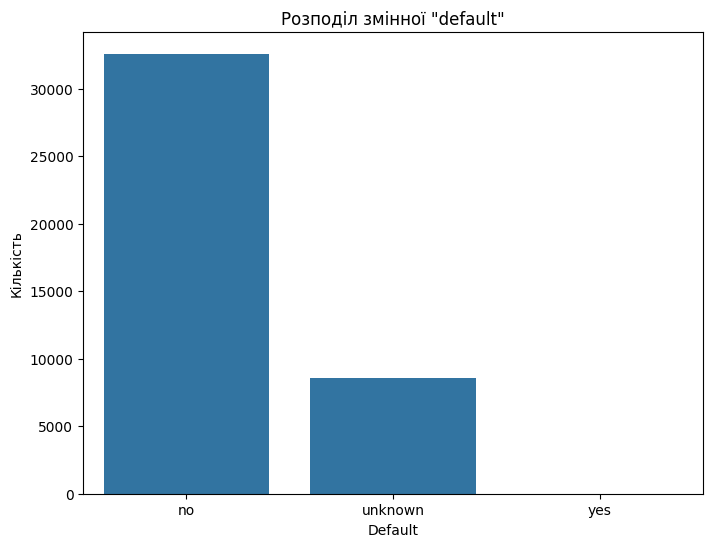

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default')
plt.title('Розподіл змінної "default"')
plt.xlabel('Default')
plt.ylabel('Кількість')
plt.show()

Гістограма для змінної housing:

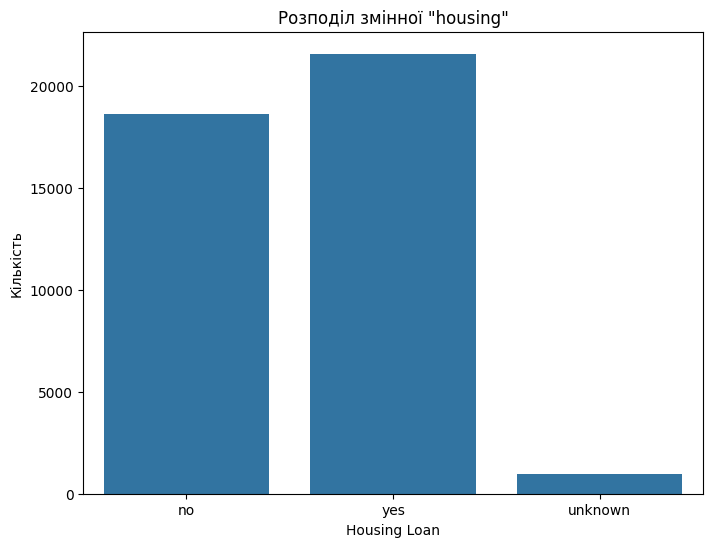

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='housing')
plt.title('Розподіл змінної "housing"')
plt.xlabel('Housing Loan')
plt.ylabel('Кількість')
plt.show()


Гістограма для змінної loan:

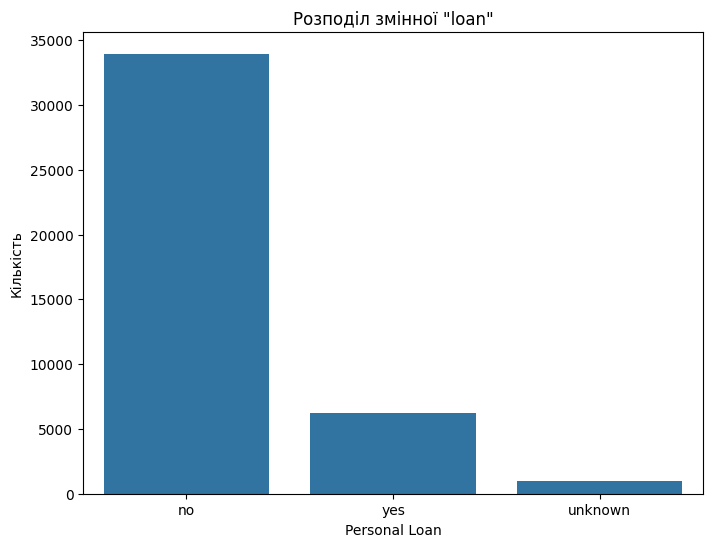

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan')
plt.title('Розподіл змінної "loan"')
plt.xlabel('Personal Loan')
plt.ylabel('Кількість')
plt.show()


Завдання 8 Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [14]:
bank_client = pd.read_csv(file_path, sep=';', quotechar='"')

label_encoder = LabelEncoder()

for column in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
     df[column + '_encoded'] = label_encoder.fit_transform(df[column])

print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  cons.conf.idx  euribor3m  nr.employed   y  \
0   may         mon  ...          -36.4      4.857       5191.0  no   
1   may         mon  ...          -36.4      4.857       5191.0  no   
2   may         mon  ...          -36.4      4.857       5191.0  no   
3   may         mon  ...          -36.4      4.857       5191.0  no   
4   may         mon  ...          -36.4      4.857       5191.0  no   

  job_encoded  marital_encoded  education_encoded  default_encoded  \
0           3                1                

In [15]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:

    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df.loc[df[col].notnull(), col] = le.fit_transform(not_null)

    return df

In [16]:
bank_client = pd.read_csv(file_path, sep=';', quotechar='"')
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
print(bank_client.head())

   age job marital education default housing loan    contact month  \
0   56   3       1         0       0       0    0  telephone   may   
1   57   7       1         3       1       0    0  telephone   may   
2   37   7       1         3       0       2    0  telephone   may   
3   40   0       1         1       0       0    0  telephone   may   
4   56   7       1         3       0       0    2  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1 

Завдання 9 Трансфомувати змінну **Age** (використовуючи її квартильні значення):

In [17]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:

    q25 = dataframe[age_col].quantile(0.25)
    q50 = dataframe[age_col].quantile(0.50)
    q75 = dataframe[age_col].quantile(0.75)

    dataframe['age_encoded'] = pd.cut(dataframe[age_col], bins=[0, q25, q50, q75, dataframe[age_col].max()], labels=['Q1', 'Q2', 'Q3', 'Q4'])

    return dataframe


In [32]:
bank_client = pd.read_csv(file_path, sep=';', quotechar='"')
bank_client = encode_age(bank_client, 'age')

Висновки з завдання 9 (детальні) перевірити як відбулося перетворення змінних

In [21]:
bank_client_transformed = encode_age(bank_client, 'age')

display(bank_client_transformed)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_encoded
0,56,3,1,0,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Q4
1,57,7,1,3,1,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Q4
2,37,7,1,3,0,2,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Q2
3,40,0,1,1,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Q3
4,56,7,1,3,0,0,2,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Q4
41184,46,1,1,5,0,0,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Q3
41185,56,5,1,6,0,2,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Q4
41186,44,9,1,5,0,0,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Q3


# Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

Завдання 10 Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
* вивести цей датафрейм;
* перевірити ці змінні на NaN.

In [34]:
bank_relat_col = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

bank_relat = df[bank_relat_col].copy()

print("Дані, що характеризують зв'язок клієнтів з банком:")
display(bank_relat)

print("Пропущені значення:")
print(bank_relat.isnull().sum())


Дані, що характеризують зв'язок клієнтів з банком:


,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...
41183,cellular,nov,fri,334,1,999,0,nonexistent
41184,cellular,nov,fri,383,1,999,0,nonexistent
41185,cellular,nov,fri,189,2,999,0,nonexistent
41186,cellular,nov,fri,442,1,999,0,nonexistent


Пропущені значення:
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Завдання 11 вивести унікальні значення, які містять атрибути *contact, month, day_of_week*

In [22]:
unique_contacts = df['contact'].unique()

unique_months = df['month'].unique()

unique_days_of_week = df['day_of_week'].unique()

print("Унікальні значення атрибуту 'contact':", unique_contacts)
print("Унікальні значення атрибуту 'month':", unique_months)
print("Унікальні значення атрибуту 'day_of_week':", unique_days_of_week)

Унікальні значення атрибуту 'contact': ['telephone' 'cellular']
Унікальні значення атрибуту 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Унікальні значення атрибуту 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної Duration
змінна duration містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

Завдання 12 Аналіз атрибуту duration:
1. Провести візуальний аналіз зміної duration:
* побудувати boxplot та distplot;
* перевірити розподіл по змінній duration на важкі хвости.

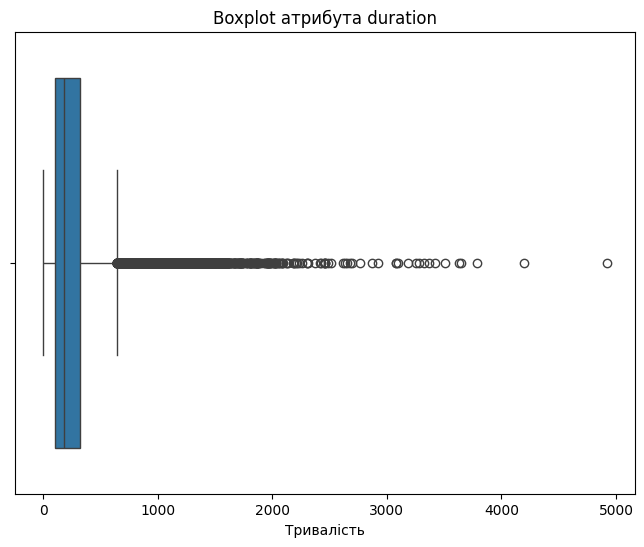

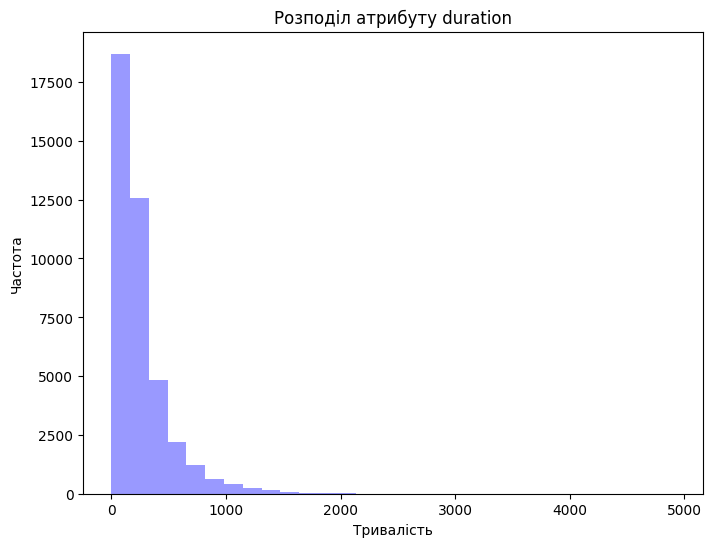

Розподіл атрибуту duration має важкий правий хвіст (позитивна асиметрія)


In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration'])
plt.title('Boxplot атрибута duration')
plt.xlabel('Тривалість')
plt.show()

plt.figure(figsize=(8, 6))
sns.distplot(df['duration'], kde=False, bins=30, color='blue')
plt.title('Розподіл атрибуту duration')
plt.xlabel('Тривалість')
plt.ylabel('Частота')
plt.show()

skewness = df['duration'].skew()
if skewness > 1:
     print("Розподіл атрибуту duration має важкий правий хвіст (позитивна асиметрія)")
elif skewness < -1:
     print("Розподіл атрибуту duration має важкий лівий хвіст (негативна асиметрія)")
else:
     print("Розподіл атрибута duration близький до нормального")

Завдання 13 Закодувати змінні **Contact, Month, Day of Week** (використовуйте функцію *encode_categorical_columns()*)

In [37]:
categorical_cols = ['contact', 'month', 'day_of_week']

df_encoded = encode_categorical_columns(df, categorical_cols)

print("Закодований датафрейм:")
display(df_encoded)

Закодований датафрейм:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,56,housemaid,married,basic.4y,no,no,no,1,6,1,...,-36.4,4.857,5191.0,no,3,1,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,6,1,...,-36.4,4.857,5191.0,no,7,1,3,1,0,0
2,37,services,married,high.school,no,yes,no,1,6,1,...,-36.4,4.857,5191.0,no,7,1,3,0,2,0
3,40,admin.,married,basic.6y,no,no,no,1,6,1,...,-36.4,4.857,5191.0,no,0,1,1,0,0,0
4,56,services,married,high.school,no,no,yes,1,6,1,...,-36.4,4.857,5191.0,no,7,1,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,7,0,...,-50.8,1.028,4963.6,yes,5,1,5,0,2,0
41184,46,blue-collar,married,professional.course,no,no,no,0,7,0,...,-50.8,1.028,4963.6,no,1,1,5,0,0,0
41185,56,retired,married,university.degree,no,yes,no,0,7,0,...,-50.8,1.028,4963.6,no,5,1,6,0,2,0
41186,44,technician,married,professional.course,no,no,no,0,7,0,...,-50.8,1.028,4963.6,yes,9,1,5,0,0,0


Завдання 14 Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [23]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    q25 = dataframe[duration_col].quantile(0.25)
    q50 = dataframe[duration_col].quantile(0.50)
    q75 = dataframe[duration_col].quantile(0.75)

    dataframe['duration_encoded'] = pd.cut(dataframe[duration_col], bins=[-np.inf, q25, q50, q75, np.inf], labels=['Q1', 'Q2', 'Q3', 'Q4'])

    return dataframe


In [39]:
bank_relat = encode_duration(bank_relat, 'duration')

# Провести аналіз атрибутів соціального та економічного контексту


Завдання 15 Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [40]:
social_economic_col = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

social_economic_df = df[social_economic_col].copy()

print("Дані, що характеризують соціальний та економічний контекст:")
display(social_economic_df)

print("Пропущені значення:")
print(social_economic_df.isnull().sum())

Дані, що характеризують соціальний та економічний контекст:


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


Пропущені значення:
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


Завдання 16 Виділити в окремий датафрейм всі інші атрибути атрибути - *campaign, pdays,previous, poutcome*

In [41]:
other_col = ['campaign', 'pdays', 'previous', 'poutcome']

bank_other = df[other_col].copy()

print("Інші дані:")
display(bank_other)

print("Пропущені значення:")
print(bank_other.isnull().sum())

Інші дані:


,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


Пропущені значення:
campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64


Завдання 17 Провести трансформацію атрибуту *poutcome*

In [42]:
bank_other = pd.get_dummies(bank_other, columns=['poutcome'], prefix='poutcome')

print("Трансформовані дані:")
display(bank_other)

Трансформовані дані:


,campaign,pdays,previous,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,999,0,False,True,False
1,1,999,0,False,True,False
2,1,999,0,False,True,False
3,1,999,0,False,True,False
4,1,999,0,False,True,False
...,...,...,...,...,...,...
41183,1,999,0,False,True,False
41184,1,999,0,False,True,False
41185,2,999,0,False,True,False
41186,1,999,0,False,True,False


# Будування моделей класифікації

Завдання 18 З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [43]:
final_df = pd.concat([bank_client, bank_relat, bank_other], axis=1)

desired_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign' , 'pdays', 'previous', 'poutcome']
extra_columns = [col for col in final_df.columns if col not in desired_columns]

final_df.drop(columns=extra_columns, inplace=True)

print("Загальний датафрейм:")
display(final_df.head())
print("\nІнформація про датафрейм:")
print(final_df.info())

Загальний датафрейм:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month,day_of_week,duration,campaign,pdays,previous,poutcome,campaign,pdays,previous
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,may,mon,261,1,999,0,nonexistent,1,999,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,may,mon,149,1,999,0,nonexistent,1,999,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,may,mon,226,1,999,0,nonexistent,1,999,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,may,mon,151,1,999,0,nonexistent,1,999,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,may,mon,307,1,999,0,nonexistent,1,999,0



Інформація про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  contact      41188 non-null  object
 16  month        41188 non-null  object
 17  day_of_week  41188 non-null  object
 18  duration     41188 non-null  int64 
 19

Завдання 19 Провести ділення вибірки

In [44]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)

    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold


In [45]:
def scale_the_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

# Логістична Регресія

In [46]:
feature_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

X = pd.get_dummies(df[feature_columns], columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
y = df['y']
test_size = 0.2
n_splits = 3
random_state = 12
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(X, y, test_size, n_splits, random_state)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[7119  197]
 [ 543  379]]
91.0


# k-NN


k=1 88.72 (+/- 0.12)
k=2 89.73 (+/- 0.13)
k=3 90.05 (+/- 0.19)
k=4 90.24 (+/- 0.13)
k=5 90.41 (+/- 0.03)
k=6 90.62 (+/- 0.05)
k=7 90.78 (+/- 0.02)
k=8 90.76 (+/- 0.05)
k=9 90.82 (+/- 0.15)
k=10 90.83 (+/- 0.08)
k=11 90.88 (+/- 0.03)
k=12 90.81 (+/- 0.09)
k=13 90.85 (+/- 0.12)
k=14 90.88 (+/- 0.07)
k=15 90.97 (+/- 0.12)
k=16 91.08 (+/- 0.12)
k=17 91.02 (+/- 0.12)
k=18 90.94 (+/- 0.05)
k=19 90.94 (+/- 0.13)
k=20 91.02 (+/- 0.11)
k=21 90.98 (+/- 0.17)
k=22 90.99 (+/- 0.11)
k=23 90.97 (+/- 0.12)
k=24 90.99 (+/- 0.04)
k=25 91.01 (+/- 0.09)
The optimal number of neighbors is 15 with 91.1%


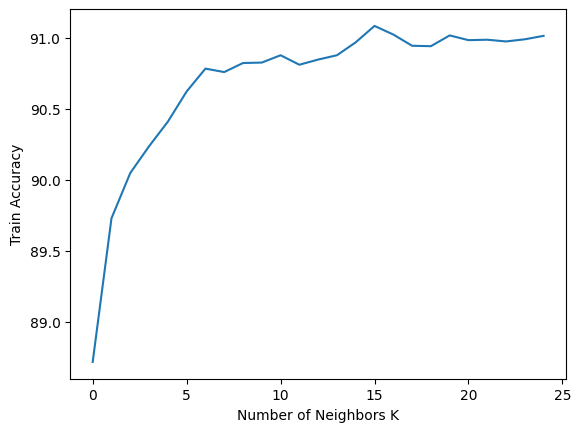

In [47]:
neighbors = np.arange(0,25)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [165]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(X, y, test_size, n_splits, random_state)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean())


[[7119  197]
 [ 543  379]]
91.0


# Логістична Регресія

In [193]:
dt = DecisionTreeClassifier()
DTCV = cross_val_score(dt, X_train, y_train, cv=k_fold, scoring='accuracy').mean()

rf = RandomForestClassifier()
RFCV = cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='accuracy').mean()

knn = KNeighborsClassifier()
KNNCV = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy').mean()

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GBCV = cross_val_score(gb_classifier, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()

models = pd.DataFrame({
    'Models': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [LOGCV, KNNCV, DTCV, RFCV, GBCV]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,Gradient Boosting,0.912722
3,Random Forest,0.910713
0,Logistic Regression,0.910415
1,KNN,0.904097
2,Decision Tree,0.886859


# Висновки по моделям (детальні)

1. Логістичної регресії, важливо розібрати матрицю помилок і метрики оцінки якості моделі.
Матриця помилок:
[[7119 197]
  [543379]]
Метрика оцінки якості моделі:
Accuracy: 91.0%
Тепер розберемося з кожним елементом:
* **Матриця помилок**:
    - Верхня ліва комірка (7119) - True Negative (TN): кількість правильно передбачених негативних класів.
    - Верхній правий осередок (197) - False Positive (FP): кількість неправильно передбачених позитивних класів.
    - Нижній лівий осередок (543) - False Negative (FN): кількість неправильно передбачених негативних класів.
    - Нижній правий осередок (379) - True Positive (TP): кількість правильно передбачених позитивних класів.
* **Метрика Accuracy (точність)**:
    - Accuracy: 91.0% - це відсоток правильно класифікованих спостережень щодо загальної кількості спостережень.

**Детальні висновки**:
- Модель логістичної регресії має високу точність (Accuracy) в 91.0%, що говорить про хорошу загальну якість моделі.
- З матриці помилок видно, що модель правильно класифікувала більшість спостережень: 7119 True Negatives та 379 True Positives.
- Однак є також невелика кількість неправильно класифікованих спостережень: 197 False Positives та 543 False Negatives.
- False Positives означають, що модель неправильно передбачила негативний клас як позитивний.
- False Negatives вказують на те, що модель неправильно передбачила позитивний клас як негативний.
На основі цих висновків можна зробити припущення про необхідність додаткового аналізу та покращення моделі, можливо, шляхом налаштування параметрів або використання інших методів класифікації.

**********
2. Результати моделі k-NN при різних значеннях параметра k та супутньої метрики точності (accuracy) з довірчим інтервалом.
Оптимальна кількість сусідів – 15, з точністю 91.1%.
**Висновки**:
- Модель k-NN із різними значеннями параметра k показує різну точність.
- Точність моделі збільшується зі збільшенням значення k до певного краю (у разі до k=15), після чого залишається приблизно одному рівні.
- Довірчі інтервали для точності моделі звужуються зі зростанням k, що вказує на впевненість у передбаченнях моделі.
- Оптимальне значення k вибрано з урахуванням максимальної точності моделі, що становить 91.1% для k=15.
- Подальше збільшення k не призводить до суттєвого покращення точності моделі.
Таким чином, для даної моделі оптимальним є вибір k=15, що дозволяє досягти найвищої класифікації точності.

**********
3. Логістична Регресія

Виходячи з наданих даних, можна зробити такі висновки щодо якості моделей:

a. **Gradient Boosting**: Ця модель показує найвищий показник точності (Score) серед усіх розглянутих моделей, що дорівнює 0.912722. Gradient Boosting зазвичай демонструє високу точність та хорошу здатність узагальнення, що може робити її добрим вибором для різноманітних завдань класифікації.

b. **Random Forest**: Наступна за точністю модель, Random Forest, має Score рівний 0.910713. Random Forest також має хорошу точність і є потужним алгоритмом, здатним обробляти великі обсяги даних та стійким до перенавчання.

c. **Logistic Regression**: Логістична регресія займає третє місце за точністю з Score 0.910415. Цей алгоритм часто використовується в задачах бінарної класифікації і має простоту інтерпретації результатів.

d. **KNN (k-Nearest Neighbors)**: KNN має Score 0.904097 і займає четверте місце за точністю серед розглянутих моделей. KNN - це метод, заснований на інстансах, який може бути ефективним у деяких випадках, але зазвичай потребує великих обчислювальних ресурсів.

e. **Decision Tree**: Вирішальне дерево демонструє найменшу точність серед усіх розглянутих моделей, з Score 0.886859. Вирішальні дерева можуть бути простими у розумінні та інтерпретації, але можуть схилятися до перенавчання, особливо на складних даних.

*Виходячи з цих висновків*, можна зробити припущення про те, що для цієї задачі класифікації найкращим вибором є Gradient Boosting, за яким слідує Random Forest і Logistic Regression. Однак вибір моделі також може залежати від інших факторів, таких як інтерпретація результатів, обчислювальна складність та вимоги до швидкості роботи.